In [9]:
!pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn openpyxl xlsxwriter ipython jupyter notebook ipynbname


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. 데이터 확인

In [6]:
import subprocess
import shutil
import re
import subprocess      # ← 이 줄 반드시 추가
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
# 그래프 한글폰트 깨짐 방지 (선택)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준
plt.rcParams['axes.unicode_minus'] = False
print("📊 패키지 불러오기 완료!")

📊 패키지 불러오기 완료!


In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/delic1758/K-Frailty/main/data/K-Frailty.csv"
df = pd.read_csv(url)
df.head()

C:\Users\SM\AppData\Local\Temp\ipykernel_8676\4187022785.py:3: DtypeWarning: Columns (311,428,490,491,492,493,494,495,496,497,498,499) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,PID,seqNo,surveyNoR,ANS_TYPE,ANS_SUB1,ANS_SUB2,ANS2_TYPE,ANS2_SUB,A11_1,A11_2,...,T나이_3,T혼인상태,THTYPE,T교육수준,T취업여부,TJ3K13H_3_1,TR가구원수,T가구주와의관계코드,TJ3K13H_3_2,Z_MC7_1
0,159330$1,159330,39005,0,,,2,,1,1,...,4,2,1,2,2,2,1,1,2,2
1,159313$1,159313,39005,0,,,2,,1,1,...,3,2,1,4,2,1,1,1,1,2
2,159329$1,159329,39005,0,,,2,,1,1,...,1,2,1,3,1,3,1,1,2,2
3,159335$1,159335,39005,0,,,2,,1,1,...,5,2,1,4,2,3,1,1,2,2
4,159425$1,159425,39006,0,,,1,2,3,2,...,2,1,3,4,2,3,3,1,2,1


In [96]:
print("✅ 데이터 기본 정보")
print("-" * 50)
print(f"🔹 행 개수: {df.shape[0]}")
print(f"🔹 열 개수: {df.shape[1]}")
print("\n🔹 열별 결측값 개수 (상위 20개)")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# 숫자형 변수만 확인
print("\n🔹 숫자형 변수에서 상위 값 분포")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    print(f"\n▶ {col}")
    print(df[col].value_counts().head(3))

# 문자형 변수에서 상위 값 분포
print("\n🔹 문자형 변수에서 상위 값 분포")
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    print(f"\n▶ {col}")
    print(df[col].value_counts().head(3))

print("\n🔹 열별 데이터 타입")
print(df.dtypes.value_counts())
print(df.dtypes.head(10))  # 상위 10개만 미리 보기
print("\n🔹 기본 통계 요약 (숫자형)")
print(df.describe().T.head(10))  # 상위 10개 요약

✅ 데이터 기본 정보
--------------------------------------------------
🔹 행 개수: 10078
🔹 열 개수: 784

🔹 열별 결측값 개수 (상위 20개)
PID          0
seqNo        0
surveyNoR    0
ANS_TYPE     0
ANS_SUB1     0
ANS_SUB2     0
ANS2_TYPE    0
ANS2_SUB     0
A11_1        0
A11_2        0
A11_3        0
HTYPE        0
S6_1         0
S6_2         0
S6_3         0
S6_4         0
S6_5         0
A10_1        0
A10_2        0
RES_HNO      0
dtype: int64

🔹 숫자형 변수에서 상위 값 분포

▶ seqNo
seqNo
121515    3
109922    3
110418    3
Name: count, dtype: int64

▶ surveyNoR
surveyNoR
37033    20
37034    19
11117    19
Name: count, dtype: int64

▶ ANS_TYPE
ANS_TYPE
0    9951
1      96
2      31
Name: count, dtype: int64

▶ ANS2_TYPE
ANS2_TYPE
2    8473
1    1605
Name: count, dtype: int64

▶ A11_1
A11_1
2    5915
1    3448
3     535
Name: count, dtype: int64

▶ A11_2
A11_2
2    5656
1    4329
3      93
Name: count, dtype: int64

▶ A11_3
A11_3
1    5057
2    4952
3      69
Name: count, dtype: int64

▶ HTYPE
HTYPE
3     5203
1     344

In [7]:
# 이상치 확인

for col in df.columns:
    try:
        print(f"\n▶ {col}")
        print(df[col].value_counts(dropna=False).head(10))
    except Exception as e:
        print(f"⚠️ {col} 처리 중 오류 발생: {e}")


▶ PID
PID
159330$1    1
159313$1    1
159329$1    1
159335$1    1
159425$1    1
159450$1    1
159436$1    1
159430$1    1
159393$1    1
159423$1    1
Name: count, dtype: int64

▶ seqNo
seqNo
121515    3
109922    3
110418    3
154915    3
130402    3
158294    3
158629    3
114465    3
129129    3
143030    3
Name: count, dtype: int64

▶ surveyNoR
surveyNoR
37033    20
37034    19
11117    19
37014    19
31004    18
11114    18
38034    17
33018    17
32022    17
37040    17
Name: count, dtype: int64

▶ ANS_TYPE
ANS_TYPE
0    9951
1      96
2      31
Name: count, dtype: int64

▶ ANS_SUB1
ANS_SUB1
      9951
2       61
11      29
12      13
15      11
17       6
13       2
34       1
53       1
16       1
Name: count, dtype: int64

▶ ANS_SUB2
ANS_SUB2
     9951
2      44
5      39
1      21
3      18
4       5
Name: count, dtype: int64

▶ ANS2_TYPE
ANS2_TYPE
2    8473
1    1605
Name: count, dtype: int64

▶ ANS2_SUB
ANS2_SUB
      8473
2     1549
11      11
15       7
32       5
34     

# 2. 데이터 전처리

## 1) 변수 추출

In [97]:
# 사용할 변수 리스트
used_vars = [
    'C3', 'C4', 'C5', 'B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6', 'B3_2L_7', 'B3_2L_9',
    'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29', 'RES_SEX', 'RES_AGE', 'RES_MAR', 'RES_EDU1',
    'RES_EMP', 'B1', 'B2', 'B3C', 'B3_2L_3', 'B3_2L_8', 'B3_2L_10', 'B3_2L_11', 'B3_2L_12',
    'B3_2L_15', 'B3_2L_16', 'B3_2L_17', 'B3_2L_18', 'B3_2L_19', 'B3_2L_20', 'B3_2L_21',
    'B3_2L_22', 'B3_2L_23', 'B3_2L_24', 'B3_2L_26', 'B3_2L_27', 'B3_2L_28', 'B3_2L_30',
    'B3_2L_31', 'B3_2L_32', 'B3_2L_33', 'B4', 'B5', 'B7_1', 'B7_2', 'B8_1', 'B8_2', 'B8_3', 'B8_4',
    'B8_5', 'B8_6', 'B8_7', 'B8_8', 'B8_9', 'B8_10', 'B8_11', 'B8_12', 'B8_13', 'B8_14', 'B8_15',
    'B9', 'B10', 'B11', 'B12', 'B13_1', 'B13_2', 'B13_6', 'B13_9', 'B13_10', 'B13_11', 'B16_1',
    'B16_2', 'B17_1', 'C6', 'C7_1', 'C7_2', 'C7_3', 'C7_4', 'C7_5', 'C7_6', 'C7_7', 'C8_1_1',
    'C8_1_2', 'C8_1_3', 'C8_1_4', 'C8_1_5', 'C8_1_6', 'C8_1_7', 'C8_2_8', 'C8_2_9', 'C8_2_10',
    'C9', 'C10', 'C10_1', 'C11', 'D10', 'D11_1_1', 'D11_1_2', 'D11_1_3', 'D11_2_1', 'D11_2_2',
    'D11_2_3', 'D13', 'E1', 'H1', 'H2', 'H9', 'H11', 'QIK2', 'J2', 'J3b_1_13', 'J3b_3_13', 'J4',
    'J4_1', 'TQIK2_1.5sd', 'TareaUMD_2', 'TSIDO', 'T나이_3', 'THTYPE', 'TJ3K13H_3_1', 'TR가구원수',
    'T가구주와의관계코드', 'TJ3K13H_3_2', 'Z_MC7_1'
]

# 선택된 변수만 추출
df_selected = df[used_vars]
df_selected.head()

,C3,C4,C5,B3_2L_1,B3_2L_2,B3_2L_4,B3_2L_5,B3_2L_6,B3_2L_7,B3_2L_9,...,TQIK2_1.5sd,TareaUMD_2,TSIDO,T나이_3,THTYPE,TJ3K13H_3_1,TR가구원수,T가구주와의관계코드,TJ3K13H_3_2,Z_MC7_1
0,4,2,2,1,2,2,2,2,2,2,...,2,1,39,4,1,2,1,1,2,2
1,3,2,2,2,2,2,2,2,1,2,...,2,1,39,3,1,1,1,1,1,2
2,3,2,2,1,2,2,2,2,2,2,...,1,1,39,1,1,3,1,1,2,2
3,4,1,1,2,2,2,2,2,2,2,...,2,1,39,5,1,3,1,1,2,2
4,2,1,1,2,1,2,2,2,2,2,...,1,1,39,2,3,3,3,1,2,1


## 2) 변수 생성

In [98]:
# 🔸 1. Frailty_Chronic_Score (5개 이상 만성질환 여부 → 1점)
frailty_vars = ['B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6', 'B3_2L_7',
                'B3_2L_9', 'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29']
df['Frailty_Chronic_Score'] = (
    df[frailty_vars].apply(lambda row: (row == 1).sum(), axis=1) >= 5
).astype(int)

# 🔸 2. Weight_Change_1y (6개월간 체중감소 5% 이상 → 1점)
df['Weight_Change_1y'] = ((df['B7_1'] - df['B7_3']) / df['B7_1'] >= 0.05).astype(int)

# 🔸 3. Depression_Score_15 (긍정/부정형 반영 점수 합산)
df['Depression_Score_15'] = (
    (df['B8_1'] == 2).astype(int) + (df['B8_2'] == 1).astype(int) +
    (df['B8_3'] == 1).astype(int) + (df['B8_4'] == 1).astype(int) +
    (df['B8_5'] == 2).astype(int) + (df['B8_6'] == 1).astype(int) +
    (df['B8_7'] == 2).astype(int) + (df['B8_8'] == 1).astype(int) +
    (df['B8_9'] == 1).astype(int) + (df['B8_10'] == 1).astype(int) +
    (df['B8_11'] == 2).astype(int) + (df['B8_12'] == 1).astype(int) +
    (df['B8_13'] == 2).astype(int) + (df['B8_14'] == 1).astype(int) +
    (df['B8_15'] == 1).astype(int)
)

# 🔸 4. ADL_Score_14 (1=2점, 2=1점, 3=0점 환산 총합)
adl_vars = ['C7_1', 'C7_2', 'C7_3', 'C7_4', 'C7_5', 'C7_6', 'C7_7']
df['ADL_Score_14'] = df[adl_vars].apply(
    lambda row: ((row == 1)*2 + (row == 2)*1).sum(), axis=1)

# 🔸 5. IADL_Score_20 (1=2점, 2=1점, 3=0점 환산 총합)
iadl_vars = ['C8_1_1', 'C8_1_2', 'C8_1_3', 'C8_1_4', 'C8_1_5', 'C8_1_6', 'C8_1_7',
             'C8_2_8', 'C8_2_9', 'C8_2_10']
df['IADL_Score_20'] = df[iadl_vars].apply(
    lambda row: ((row == 1)*2 + (row == 2)*1).sum(), axis=1)

# ✅ 생성된 변수 확인
print(df[['Frailty_Chronic_Score', 'Weight_Change_1y', 'Depression_Score_15',
          'ADL_Score_14', 'IADL_Score_20']].describe())


       Frailty_Chronic_Score  Weight_Change_1y  Depression_Score_15  \
count           10078.000000      10078.000000         10078.000000   
mean                0.002878          0.016968             3.055070   
std                 0.053568          0.129157             3.233226   
min                 0.000000          0.000000             0.000000   
25%                 0.000000          0.000000             0.000000   
50%                 0.000000          0.000000             2.000000   
75%                 0.000000          0.000000             5.000000   
max                 1.000000          1.000000            15.000000   

       ADL_Score_14  IADL_Score_20  
count  10078.000000   10078.000000  
mean      13.767116      19.168684  
std        1.126530       2.633161  
min        0.000000       0.000000  
25%       14.000000      20.000000  
50%       14.000000      20.000000  
75%       14.000000      20.000000  
max       14.000000      20.000000  


### Frailty_Chronic_Score
평균이 0.0029, 최대값 1 → 5개 이상 만성질환을 가진 비율이 극히 낮음 (약 0.29%)
대부분 0, 즉 5개 이상 만성질환자가 거의 없음

Weight_Change_1y
평균 0.017, 최대 1 → 1년간 5% 이상 체중감소 경험자도 극소수 (약 1.7%)
체중 감소 기준, 이상값(체중증가 등) 검토 필요

Depression_Score_15
평균 3.05, 최대 15점 → 우울 점수 분포는 정상적
015점 분포, 25점이 중위수

ADL_Score_14 / IADL_Score_20
평균 ADL 13.8(최대 14), IADL 19.2(최대 20)
대부분 기능독립적(점수 높을수록 독립)

ADL, IADL 변수 환산식에 오류 없음
하지만 최솟값이 0도 존재 → 소수 기능저하군 있음

### 노쇠 변수 생성

In [99]:
# 만성질환 변수 11개 리스트 (예시: 변수명을 실제 코드에 맞게 채워야 함)
chronic_vars = [
    'B3_2L_1', 'B3_2L_2', 'B3_2L_4', 'B3_2L_5', 'B3_2L_6',
    'B3_2L_7', 'B3_2L_9', 'B3_2L_13', 'B3_2L_14', 'B3_2L_25', 'B3_2L_29'
]

# 1. 만성질환 5개 이상 보유
df['Frailty_Chronic_Score'] = (df[chronic_vars] == 1).sum(axis=1)
df['Frailty_Chronic_Score'] = (df['Frailty_Chronic_Score'] >= 5).astype(int)

# 2. 1년간 5% 체중감소 여부
df['Weight_Change_1y'] = (
    ((df['B7_3'] - df['B7_1']) / df['B7_3'] >= 0.05) & (df['B7_3'] > 0)
).astype(int)

# 3. C3: 피로 ('항상 그렇다'==1, '거의 대부분 그렇다'==2 → 1점)
df['Frailty_Fatigue'] = df['C3'].isin([1, 2]).astype(int)

# 4. C4: 계단 오르기 어려움 (1.예=1점)
df['Frailty_Stair'] = (df['C4'] == 1).astype(int)

# 5. C5: 300m 걷기 어려움 (1.예=1점)
df['Frailty_Walk'] = (df['C5'] == 1).astype(int)

# 6. 노쇠 점수 합산 (0~5점)
df['Frailty_Score'] = (
    df['Frailty_Fatigue'] +
    df['Frailty_Stair'] +
    df['Frailty_Walk'] +
    df['Frailty_Chronic_Score'] +
    df['Weight_Change_1y']
)

# 결과 요약 확인
print(df[['Frailty_Fatigue', 'Frailty_Stair', 'Frailty_Walk', 'Frailty_Chronic_Score', 'Weight_Change_1y', 'Frailty_Score']].describe())
print(df['Frailty_Score'].value_counts())


       Frailty_Fatigue  Frailty_Stair  Frailty_Walk  Frailty_Chronic_Score  \
count     10078.000000   10078.000000  10078.000000           10078.000000   
mean          0.090693       0.295396      0.215122               0.002878   
std           0.287186       0.456243      0.410927               0.053568   
min           0.000000       0.000000      0.000000               0.000000   
25%           0.000000       0.000000      0.000000               0.000000   
50%           0.000000       0.000000      0.000000               0.000000   
75%           0.000000       1.000000      0.000000               0.000000   
max           1.000000       1.000000      1.000000               1.000000   

       Weight_Change_1y  Frailty_Score  
count      10078.000000   10078.000000  
mean           0.040683       0.644771  
std            0.197564       0.938639  
min            0.000000       0.000000  
25%            0.000000       0.000000  
50%            0.000000       0.000000  
75%       

### 요약
분포가 지나치게 한쪽에 쏠리거나(0점 많음), 변수 생성 오류 없이 정상적으로 반영됨
만성질환 5개 이상 보유 노인(1점 받은 사람)은 0.2%(극소수), 만성질환 기준이 실제 데이터에서 드물다는 뜻
노쇠 위험군 커트(예: 3점 이상 frail)는 그대로 Cut-off 설정해도 무방

## 노쇠군 그룹(Frailty_Group) 변수 생성

In [100]:
# 노쇠 점수 기준 노쇠군 생성 (예시)
def assign_frailty_group(score):
    if score == 0:
        return '정상'
    elif score in [1, 2]:
        return '전노쇠'
    else:
        return '노쇠'

df['Frailty_Group'] = df['Frailty_Score'].apply(assign_frailty_group)
print(df['Frailty_Group'].value_counts())

Frailty_Group
정상     6269
전노쇠    3309
노쇠      500
Name: count, dtype: int64


## 나이 변수 라벨링

In [101]:
# 숫자 코드 -> 연령 라벨로 변환
age_map = {1: '65-69', 2: '70-74', 3: '75-79', 4: '80-84', 5: '85-89', 6: '90+'}

# 공백 제거 후 매핑 적용 (혹시 모를 문자열 숫자 대응도 포함)
df['T나이_3'] = df['T나이_3'].astype(str).str.strip().astype(int)
df['나이(5세 기준)'] = df['T나이_3'].map(age_map)

# ✅ 예시 10건 확인
print(df[['T나이_3', '나이(5세 기준)']].head(10))

# ✅ 연령 구간별 빈도 확인
print(df['나이(5세 기준)'].value_counts().sort_index())


   T나이_3 나이(5세 기준)
0      4     80-84
1      3     75-79
2      1     65-69
3      5     85-89
4      2     70-74
5      5     85-89
6      4     80-84
7      4     80-84
8      1     65-69
9      1     65-69
나이(5세 기준)
65-69    3249
70-74    2482
75-79    1950
80-84    1544
85-89     668
90+       185
Name: count, dtype: int64


# 3. 기초 통계 분석

                노쇠n(%)      전노쇠n(%)        정상n(%)    전체n(100%)
나이(5세 기준)                                                     
65-69        46 (1.4%)  646 (19.9%)  2557 (78.7%)  3249 (100%)
70-74        77 (3.1%)  668 (26.9%)  1737 (70.0%)  2482 (100%)
75-79       116 (5.9%)  761 (39.0%)  1073 (55.0%)  1950 (100%)
80-84      154 (10.0%)  737 (47.7%)   653 (42.3%)  1544 (100%)
85-89       79 (11.8%)  381 (57.0%)   208 (31.1%)   668 (100%)
90+         28 (15.1%)  116 (62.7%)    41 (22.2%)   185 (100%)


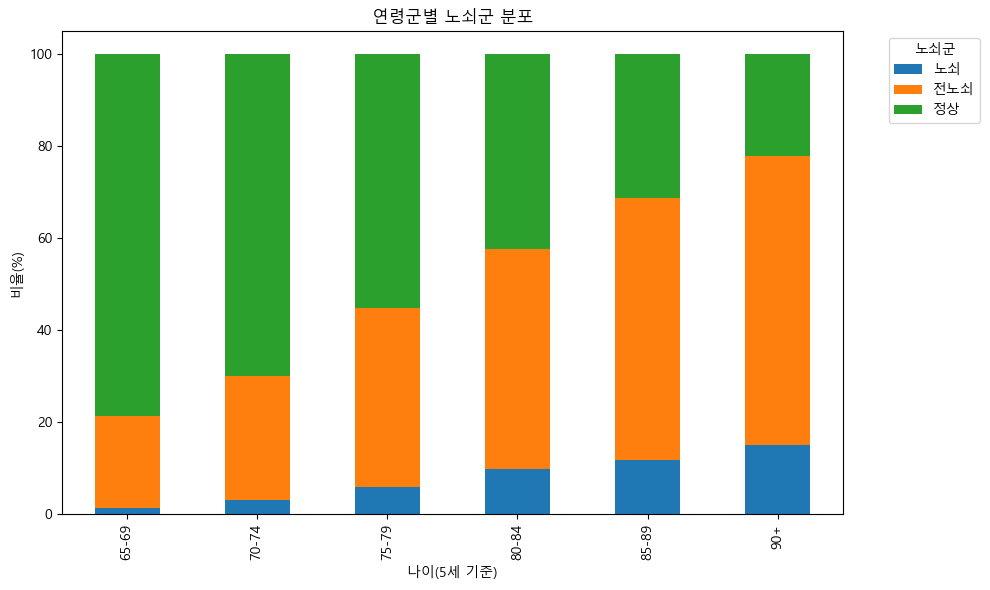

In [89]:
# 교차표
cross = pd.crosstab(df['나이(5세 기준)'], df['Frailty_Group'])
cross_sum = cross.sum(axis=1)  # 각 연령군 n

# % 계산 (가로방향, 즉 연령군 내에서 100%)
cross_pct = cross.div(cross_sum, axis=0) * 100

# 표 생성
result = pd.DataFrame(index=cross.index)
for col in cross.columns:
    result[f"{col}n(%)"] = [
        f"{n} ({pct:.1f}%)" for n, pct in zip(cross[col], cross_pct[col])
    ]

# 전체n(100%) 열 추가
result['전체n(100%)'] = [f"{n} (100%)" for n in cross_sum]

# 결과 출력
print(result)

import matplotlib.pyplot as plt

# cross_pct: 연령별 각 노쇠군의 % (가로방향 100%)
# cross_pct DataFrame이 이미 있음 (index=연령군, columns=Frailty_Group)

# 그래프 그리기
cross_pct.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('나이(5세 기준)')
plt.ylabel('비율(%)')
plt.title('연령군별 노쇠군 분포')
plt.legend(title='노쇠군', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 변수명 변경(코드명 -> 한글 변수명)

In [102]:
rename_map = {'C3': '피로', 'C4': '계단 오르기 어려움', 'C5': '걷기 어려움', 'Frailty_Chronic_Score': '5개 이상 만성질환 여부', 'Weight_Change_1y': '몸무게 변화 여부(1년간)', 'RES_SEX': '성별', 'RES_AGE': '나이', 'RES_MAR': '혼인상태', 'RES_EDU1': '교육수준', 'RES_EMP': '취업여부', 'B1': '평소의 건강상태', 'B2': '수면의 질', 'B3C': '의사진단 만성질환 총 수', 'B3_2L_3': '고지혈증', 'B3_2L_8': '갑상선 질환', 'B3_2L_10': '골다공증', 'B3_2L_11': '요통', 'B3_2L_12': '골절 및 사고 후유증', 'B3_2L_15': '결핵', 'B3_2L_16': '우울증 진단 여부', 'B3_2L_17': '치매', 'B3_2L_18': '파킨슨병', 'B3_2L_19': '불면증', 'B3_2L_20': '백내장', 'B3_2L_21': '녹내장', 'B3_2L_22': '만성중이염', 'B3_2L_23': '노인성 난청', 'B3_2L_24': '피부질환', 'B3_2L_26': '위십이지장궤양', 'B3_2L_27': '간염', 'B3_2L_28': '간경변증', 'B3_2L_30': '전립선 비대증', 'B3_2L_31': '요실금', 'B3_2L_32': '빈혈', 'B3_2L_33': '기타 만성질환', 'B4': '복용 약물 수', 'B5': '병원 이용 여부', 'B7_1': '현재 키', 'B7_2': '몸무게', 'Depression_Score_15': '우울증 점수', 'B8_1': '우울_생활 만족', 'B8_2': '우울_의욕저하', 'B8_3': '우울_헛된 느낌', 'B8_4': '우울_지루함', 'B8_5': '우울_상쾌함', 'B8_6': '우울_불안함', 'B8_7': '우울_즐거움', 'B8_8': '우울_절망감', 'B8_9': '우울_외출 기피', 'B8_10': '우울_기억력 저하', 'B8_11': '우울_삶의 즐거움', 'B8_12': '우울_쓸모없음', 'B8_13': '우울_기력 좋음', 'B8_14': '우울_희망 없음', 'B8_15': '우울_자기비하', 'B9': '자살생각', 'B10': '현재 흡연', 'B11': '음주 빈도', 'B12': '운동 여부', 'B13_1': '영양_음식조절', 'B13_2': '영양_하루2끼미만', 'B13_6': '영양_과음', 'B13_9': '영양_혼자 식사', 'B13_10': '영양_약 복용 다수', 'B13_11': '영양_체중변화', 'B16_1': '의료미수진_병원', 'B16_2': '의료미수진_치과', 'B17_1': '건강검진 여부', 'C6': '낙상 경험', 'ADL_Score_14': 'ADL 점수', 'C7_1': 'ADL_옷입기', 'C7_2': 'ADL_세수,양치', 'C7_3': 'ADL_목욕', 'C7_4': 'ADL_식사', 'C7_5': 'ADL_기상 및 외출', 'C7_6': 'ADL_화장실 사용', 'C7_7': 'ADL_배변 조절', 'IADL_Score_20': 'IADL 점수', 'C8_1_1': 'IADL_몸단장', 'C8_1_2': 'IADL_집안일', 'C8_1_3': 'IADL_식사준비', 'C8_1_4': 'IADL_빨래', 'C8_1_5': 'IADL_약 복용', 'C8_1_6': 'IADL_금전관리', 'C8_1_7': 'IADL_외출', 'C8_2_8': 'IADL_물건구매', 'C8_2_9': 'IADL_전화', 'C8_2_10': 'IADL_교통수단', 'C9': '일상 도움 여부', 'C10': '장기요양 신청', 'C10_1': '장기요양 등급', 'C11': '장애 판정 여부', 'D10': '인터넷 사용 여부', 'D11_1_1': '스마트폰 보유', 'D11_1_2': '컴퓨터 보유', 'D11_1_3': '스마트워치 보유', 'D11_2_1': '스마트폰 사용', 'D11_2_2': '컴퓨터 사용', 'D11_2_3': '스마트워치 사용', 'D13': '정보화사회 적응 어려움', 'E1': '경제활동 여부', 'H1': '거주형태', 'H2': '주거 만족도', 'H9': '교통수단', 'H11': '운전 여부', 'QIK2': '인지기능 점수_총점', 'J2': '기초생활보장 수급 여부', 'J3b_1_13': '본인 총수입', 'J3b_3_13': '가구 총수입', 'J4': '가구 소비지출', 'J4_1': '가구 주거비', 'TQIK2_1.5sd': '인지기능 저하 여부', 'TareaUMD_2': '지역', 'TSIDO': '시도', 'T나이_3': '연령(5세 단위)', 'THTYPE': '가구 형태', 'TJ3K13H_3_1': '연가구소득', 'TR가구원수': '가구원수', 'T가구주와의관계코드': '가구주와의 관계', 'TJ3K13H_3_2': '중위소득 대비', 'Z_MC7_1': '기능상태', 'B3_2L_1': '고혈압', 'B3_2L_2': '뇌졸중(중풍, 뇌경색)', 'B3_2L_4': '협심증', 'B3_2L_5': '심근경색증', 'B3_2L_6': '기타 심장질환(심부전증과 부정맥)', 'B3_2L_7': '당뇨병', 'B3_2L_9': '골관절염(퇴행성관절염), 류머티즘 관절염', 'B3_2L_13': '만성폐질환(만성기관지염, 폐기종)', 'B3_2L_14': '천식', 'B3_2L_25': '암(악성신생물)', 'B3_2L_29': '만성 신장 질환'}
df = df.rename(columns=rename_map) 
for col in df.columns:
    print(col)

PID
seqNo
surveyNoR
ANS_TYPE
ANS_SUB1
ANS_SUB2
ANS2_TYPE
ANS2_SUB
A11_1
A11_2
A11_3
HTYPE
S6_1
S6_2
S6_3
S6_4
S6_5
A10_1
A10_2
RES_HNO
RES_REL
성별
나이
혼인상태
교육수준
RES_EDU2
취업여부
A0_1
A2_2_1
A3_1
A4_2_1
A5_1
A6_1_2_1
A6_2_1
A7_1
A8_2_1
A9_1
A0_2
A2_2_2
A3_2
A4_2_2
A5_2
A6_1_2_2
A6_2_2
A7_2
A8_2_2
A9_2
A0_3
A2_2_3
A3_3
A4_2_3
A5_3
A6_1_2_3
A6_2_3
A7_3
A8_2_3
A9_3
A0_4
A2_2_4
A3_4
A4_2_4
A5_4
A6_1_2_4
A6_2_4
A7_4
A8_2_4
A9_4
A0_5
A2_2_5
A3_5
A4_2_5
A5_5
A6_1_2_5
A6_2_5
A7_5
A8_2_5
A9_5
A0_6
A2_2_6
A4_2_6
A3_6
A5_6
A6_1_2_6
A6_2_6
A7_6
A8_2_6
A9_6
A0_7
A2_2_7
A3_7
A4_2_7
A5_7
A6_1_2_7
A6_2_7
A7_7
A8_2_7
A9_7
평소의 건강상태
수면의 질
고혈압
뇌졸중(중풍, 뇌경색)
고지혈증
협심증
심근경색증
기타 심장질환(심부전증과 부정맥)
당뇨병
갑상선 질환
골관절염(퇴행성관절염), 류머티즘 관절염
골다공증
요통
골절 및 사고 후유증
만성폐질환(만성기관지염, 폐기종)
천식
결핵
우울증 진단 여부
치매
파킨슨병
불면증
백내장
녹내장
만성중이염
노인성 난청
피부질환
암(악성신생물)
위십이지장궤양
간염
간경변증
만성 신장 질환
전립선 비대증
요실금
빈혈
기타 만성질환
B3_33_etc
B3_2R_1
B3_2R_2
B3_2R_3
B3_2R_4
B3_2R_5
B3_2R_6
B3_2R_7
B3_2R_8
B3_2R_9
B3_2R_10
B3_2R_11
B3_2R_12
B3_2R_13
B3_2R_14
B3_2R_15
B3_2R_1

## 연속/범주 변수 구분

In [136]:
threshold = 10
연속형_변수 = []
범주형_변수 = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        고유값수 = df[col].nunique(dropna=True)
        if 고유값수 <= threshold:
            범주형_변수.append(col)
        else:
            연속형_변수.append(col)
    else:
        범주형_변수.append(col)

# 한글 컬럼 기준으로 이미 rename 완료된 상태
renamed_cont = [col for col in 연속형_변수 if col in rename_map.values()]
renamed_cat = [col for col in 범주형_변수 if col in rename_map.values()]

print(f"\n✅ 한국어 연속형 변수 ({len(renamed_cont)}개):\n" + ", ".join(renamed_cont))
print(f"\n✅ 한국어 범주형 변수 ({len(renamed_cat)}개):\n" + ", ".join(renamed_cat))



✅ 한국어 연속형 변수 (13개):
나이, 의사진단 만성질환 총 수, 복용 약물 수, 현재 키, 몸무게, 본인 총수입, 가구 총수입, 가구 소비지출, 가구 주거비, 시도, 우울증 점수, ADL 점수, IADL 점수

✅ 한국어 범주형 변수 (119개):
성별, 혼인상태, 교육수준, 취업여부, 평소의 건강상태, 수면의 질, 고혈압, 뇌졸중(중풍, 뇌경색), 고지혈증, 협심증, 심근경색증, 기타 심장질환(심부전증과 부정맥), 당뇨병, 갑상선 질환, 골관절염(퇴행성관절염), 류머티즘 관절염, 골다공증, 요통, 골절 및 사고 후유증, 만성폐질환(만성기관지염, 폐기종), 천식, 결핵, 우울증 진단 여부, 치매, 파킨슨병, 불면증, 백내장, 녹내장, 만성중이염, 노인성 난청, 피부질환, 암(악성신생물), 위십이지장궤양, 간염, 간경변증, 만성 신장 질환, 전립선 비대증, 요실금, 빈혈, 기타 만성질환, 병원 이용 여부, 우울_생활 만족, 우울_의욕저하, 우울_헛된 느낌, 우울_지루함, 우울_상쾌함, 우울_불안함, 우울_즐거움, 우울_절망감, 우울_외출 기피, 우울_기억력 저하, 우울_삶의 즐거움, 우울_쓸모없음, 우울_기력 좋음, 우울_희망 없음, 우울_자기비하, 자살생각, 현재 흡연, 음주 빈도, 운동 여부, 영양_음식조절, 영양_하루2끼미만, 영양_과음, 영양_혼자 식사, 영양_약 복용 다수, 영양_체중변화, 의료미수진_병원, 의료미수진_치과, 건강검진 여부, 피로, 계단 오르기 어려움, 걷기 어려움, 낙상 경험, ADL_옷입기, ADL_세수,양치, ADL_목욕, ADL_식사, ADL_기상 및 외출, ADL_화장실 사용, ADL_배변 조절, IADL_몸단장, IADL_집안일, IADL_식사준비, IADL_빨래, IADL_약 복용, IADL_금전관리, IADL_외출, IADL_물건구매, IADL_전화, IADL_교통수단, 일상 도움 여부, 장기요양 신청, 장기요양 등급, 장애 판정 여부, 인터넷 사용 여부, 스마트폰 보유, 컴퓨터 보유, 스마트워치 보유, 스마트폰 사

## 1) 노쇠군(정상/전노쇠/노쇠) 간의 변수 차이 분석

In [133]:
import pandas as pd
from scipy.stats import f_oneway

group_age = '나이(5세 기준)'
group_frail = 'Frailty_Group'
num_vars = ['나이', '현재 키', '몸무게', '우울증 점수', '인지기능 점수_총점', 'ADL 점수', 'IADL 점수', '의사진단 만성질환 총 수', '복용 약물 수',
    '본인 총수입', '가구 총수입', '가구 소비지출', '가구 주거비']

rows = []
for age, gdf in df.groupby(group_age):
    pvals = {}
    for var in num_vars:
        vals = [
            pd.to_numeric(gdf.loc[gdf[group_frail]==g, var], errors='coerce').dropna()
            for g in ['정상','전노쇠','노쇠']
        ]
        if all(len(x)>1 for x in vals):
            pval = f"{f_oneway(*vals)[1]:.3f}" + ('*' if f_oneway(*vals)[1]<0.05 else '')
        else:
            pval = ''
        pvals[var] = pval

    for i, fg in enumerate(['정상','전노쇠','노쇠']):
        row = {'나이(5세 기준)': age, '노쇠군': fg}
        for var in num_vars:
            sub = pd.to_numeric(gdf[gdf[group_frail]==fg][var], errors='coerce').dropna()
            row[f"{var} (mean±SD)"] = f"{sub.mean():.2f}±{sub.std():.2f}"
            if i == 0:
                row[f"{var} p-value"] = pvals[var]
            else:
                row[f"{var} p-value"] = ''
        rows.append(row)

result = pd.DataFrame(rows)
print(result)
result.to_excel(r'C:\Users\SM\Desktop\anova_frailty_group.xlsx', index=False)


   나이(5세 기준)  노쇠군 나이 (mean±SD) 나이 p-value 현재 키 (mean±SD) 현재 키 p-value  \
0      65-69   정상   66.88±1.41     0.041*     63.20±8.37       0.015*   
1      65-69  전노쇠   66.96±1.39                62.14±8.82                
2      65-69   노쇠   67.35±1.37               63.80±11.39                
3      70-74   정상   71.93±1.41     0.003*     62.62±8.64       0.014*   
4      70-74  전노쇠   72.14±1.43                61.48±8.85                
5      70-74   노쇠   72.18±1.46                61.71±9.46                
6      75-79   정상   76.78±1.45     0.002*     61.88±9.30       0.000*   
7      75-79  전노쇠   76.99±1.44                60.64±9.03                
8      75-79   노쇠   77.07±1.44                57.11±9.67                
9      80-84   정상   81.65±1.39     0.002*     60.92±9.03       0.000*   
10     80-84  전노쇠   81.89±1.42                58.12±8.95                
11     80-84   노쇠   81.97±1.31                55.90±8.86                
12     85-89   정상   86.44±1.37      0.776     59.64

In [134]:
import pandas as pd
from scipy.stats import chi2_contingency

group_age = '나이(5세 기준)'
group_frail = 'Frailty_Group'
cat_vars = cat_vars = ['성별', '혼인상태', '교육수준', '취업여부', '경제활동 여부', '거주형태', '주거 만족도', '교통수단', '운전 여부', '지역', '시도', '가구 형태', '연가구소득', '가구원수', '가구주와의 관계', '중위소득 대비', '고혈압', '뇌졸중(중풍, 뇌경색)', '고지혈증', '협심증', '심근경색증', '기타 심장질환(심부전증과 부정맥)', '당뇨병', '갑상선 질환', '골관절염(퇴행성관절염), 류머티즘 관절염', '골다공증', '요통', '골절 및 사고 후유증', '만성폐질환(만성기관지염, 폐기종)', '천식', '결핵', '우울증 진단 여부', '치매', '파킨슨병', '불면증', '백내장', '녹내장', '만성중이염', '노인성 난청', '피부질환', '암(악성신생물)', '위십이지장궤양', '간염', '간경변증', '만성 신장 질환', '전립선 비대증', '요실금', '빈혈', '기타 만성질환', '5개 이상 만성질환 여부', '기능상태', '몸무게 변화 여부(1년간)', '우울_생활 만족', '우울_의욕저하', '우울_헛된 느낌', '우울_지루함', '우울_상쾌함', '우울_불안함', '우울_즐거움', '우울_절망감', '우울_외출 기피', '우울_기억력 저하', '우울_삶의 즐거움', '우울_쓸모없음', '우울_기력 좋음', '우울_희망 없음', '우울_자기비하', '자살생각', '인지기능 저하 여부', '현재 흡연', '음주 빈도', '운동 여부', '영양_음식조절', '영양_하루2끼미만', '영양_과음', '영양_혼자 식사', '영양_약 복용 다수', '영양_체중변화', '피로', '계단 오르기 어려움', '걷기 어려움', '낙상 경험', 'ADL_옷입기', 'ADL_세수,양치', 'ADL_목욕', 'ADL_식사', 'ADL_기상 및 외출', 'ADL_화장실 사용', 'ADL_배변 조절', 'IADL_몸단장', 'IADL_집안일', 'IADL_식사준비', 'IADL_빨래', 'IADL_약 복용', 'IADL_금전관리', 'IADL_외출', 'IADL_물건구매', 'IADL_전화', 'IADL_교통수단', '일상 도움 여부', '병원 이용 여부', '의료미수진_병원', '의료미수진_치과', '건강검진 여부', '장기요양 신청', '장기요양 등급', '장애 판정 여부', '스마트폰 보유', '컴퓨터 보유', '스마트워치 보유', '스마트폰 사용', '컴퓨터 사용', '스마트워치 사용', '정보화사회 적응 어려움', '기초생활보장 수급 여부']
wide_rows = []
for age, gdf in df.groupby(group_age):
    temp = {'나이(5세 기준)': [], '노쇠군': []}
    # 노쇠군별 행 만들기
    for fg in ['정상', '전노쇠', '노쇠']:
        temp_row = {'나이(5세 기준)': age, '노쇠군': fg}
        for var in cat_vars:
            ct = pd.crosstab(gdf[var], gdf[group_frail])
            # p-value
            if ct.shape[0] > 1 and ct.shape[1] > 1:
                try:
                    pval = chi2_contingency(ct)[1]
                    pval_str = f"{pval:.3f}" + ('*' if pval < 0.05 else '')
                except:
                    pval_str = ''
            else:
                pval_str = ''
            # 범주별 값
            for cat in sorted(ct.index):
                count = ct.loc[cat, fg] if fg in ct.columns else 0
                denom = gdf[gdf[group_frail]==fg].shape[0]
                percent = (count / denom * 100) if denom > 0 else 0
                col = f"{var}_{cat} (N,%)"
                temp_row[col] = f"{count} ({percent:.1f}%)"
            # p-value는 '정상' 행에만 입력
            temp_row[f"{var} p-value"] = pval_str if fg == '정상' else ''
        wide_rows.append(temp_row)

# 정렬 및 저장
result_wide = pd.DataFrame(wide_rows)
result_wide.to_excel(r'C:\Users\SM\Desktop\chisq_frailty_group_wide.xlsx', index=False)
print(result_wide)

   나이(5세 기준)  노쇠군   성별_1 (N,%)    성별_2 (N,%) 성별 p-value 혼인상태_1 (N,%)  \
0      65-69   정상  973 (38.1%)  1584 (61.9%)     0.000*    23 (0.9%)   
1      65-69  전노쇠  194 (30.0%)   452 (70.0%)               10 (1.5%)   
2      65-69   노쇠   13 (28.3%)    33 (71.7%)                0 (0.0%)   
3      70-74   정상  775 (44.6%)   962 (55.4%)     0.000*    11 (0.6%)   
4      70-74  전노쇠  242 (36.2%)   426 (63.8%)                4 (0.6%)   
5      70-74   노쇠   24 (31.2%)    53 (68.8%)                0 (0.0%)   
6      75-79   정상  518 (48.3%)   555 (51.7%)     0.000*     7 (0.7%)   
7      75-79  전노쇠  236 (31.0%)   525 (69.0%)                2 (0.3%)   
8      75-79   노쇠   21 (18.1%)    95 (81.9%)                2 (1.7%)   
9      80-84   정상  320 (49.0%)   333 (51.0%)     0.000*     4 (0.6%)   
10     80-84  전노쇠  228 (30.9%)   509 (69.1%)                4 (0.5%)   
11     80-84   노쇠   37 (24.0%)   117 (76.0%)                1 (0.6%)   
12     85-89   정상   96 (46.2%)   112 (53.8%)     0.000*     0 (0

## 모든 나이 그룹에서 한 번이라도 p<0.05인 변수만 남기기

In [135]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
import re

group_age = '나이(5세 기준)'
group_frail = 'Frailty_Group'

num_vars = ['나이', '현재 키', '몸무게', '우울증 점수', '인지기능 점수_총점', 'ADL 점수', 'IADL 점수', '의사진단 만성질환 총 수', '복용 약물 수',
    '본인 총수입', '가구 총수입', '가구 소비지출', '가구 주거비']

cat_vars = ['성별', '혼인상태', '교육수준', '취업여부', '경제활동 여부', '거주형태', '주거 만족도', '교통수단', '운전 여부', '지역', '시도', '가구 형태', '연가구소득', '가구원수', '가구주와의 관계', '중위소득 대비', '고혈압', '뇌졸중(중풍, 뇌경색)', '고지혈증', '협심증', '심근경색증', '기타 심장질환(심부전증과 부정맥)', '당뇨병', '갑상선 질환', '골관절염(퇴행성관절염), 류머티즘 관절염', '골다공증', '요통', '골절 및 사고 후유증', '만성폐질환(만성기관지염, 폐기종)', '천식', '결핵', '우울증 진단 여부', '치매', '파킨슨병', '불면증', '백내장', '녹내장', '만성중이염', '노인성 난청', '피부질환', '암(악성신생물)', '위십이지장궤양', '간염', '간경변증', '만성 신장 질환', '전립선 비대증', '요실금', '빈혈', '기타 만성질환', '5개 이상 만성질환 여부', '기능상태', '몸무게 변화 여부(1년간)', '우울_생활 만족', '우울_의욕저하', '우울_헛된 느낌', '우울_지루함', '우울_상쾌함', '우울_불안함', '우울_즐거움', '우울_절망감', '우울_외출 기피', '우울_기억력 저하', '우울_삶의 즐거움', '우울_쓸모없음', '우울_기력 좋음', '우울_희망 없음', '우울_자기비하', '자살생각', '인지기능 저하 여부', '현재 흡연', '음주 빈도', '운동 여부', '영양_음식조절', '영양_하루2끼미만', '영양_과음', '영양_혼자 식사', '영양_약 복용 다수', '영양_체중변화', '피로', '계단 오르기 어려움', '걷기 어려움', '낙상 경험', 'ADL_옷입기', 'ADL_세수,양치', 'ADL_목욕', 'ADL_식사', 'ADL_기상 및 외출', 'ADL_화장실 사용', 'ADL_배변 조절', 'IADL_몸단장', 'IADL_집안일', 'IADL_식사준비', 'IADL_빨래', 'IADL_약 복용', 'IADL_금전관리', 'IADL_외출', 'IADL_물건구매', 'IADL_전화', 'IADL_교통수단', '일상 도움 여부', '병원 이용 여부', '의료미수진_병원', '의료미수진_치과', '건강검진 여부', '장기요양 신청', '장기요양 등급', '장애 판정 여부', '스마트폰 보유', '컴퓨터 보유', '스마트워치 보유', '스마트폰 사용', '컴퓨터 사용', '스마트워치 사용', '정보화사회 적응 어려움', '기초생활보장 수급 여부']

# ① 명목형 변수: 공백(’ ’)은 모두 NaN으로 처리
for col in cat_vars:
    if df[col].dtype == object:
        df[col] = df[col].replace(' ', pd.NA)

# ----- 연속형 결과 -----
rows = []
for age, gdf in df.groupby(group_age):
    pvals = {}
    for var in num_vars:
        # 숫자형 변환 + 결측제거
        vals = [
            pd.to_numeric(gdf.loc[gdf[group_frail]==g, var], errors='coerce').dropna()
            for g in ['정상', '전노쇠', '노쇠']
        ]
        if all(len(x) > 1 for x in vals):
            pval_float = f_oneway(*vals)[1]
            pval = f"{pval_float:.3f}" + ('*' if pval_float < 0.05 else '')
        else:
            pval_float = None
            pval = ''
        pvals[var] = (pval, pval_float)

    for i, fg in enumerate(['정상', '전노쇠', '노쇠']):
        row = {'나이(5세 기준)': age, '노쇠군': fg}
        for var in num_vars:
            sub = pd.to_numeric(gdf[gdf[group_frail]==fg][var], errors='coerce').dropna()
            row[f"{var} (mean±SD)"] = f"{sub.mean():.2f}±{sub.std():.2f}"
            row[f"{var} p-value"] = pvals[var][0] if i == 0 else ''
        rows.append(row)

anova_df = pd.DataFrame(rows)

# ✅ 연속형: "모든 나이그룹에서 한 번이라도 유의"한 변수만 남기기
sig_num_vars = []
for var in num_vars:
    ps = anova_df.loc[anova_df['노쇠군'] == '정상', f"{var} p-value"].dropna()
    for p in ps:
        m = re.match(r'([\d\.]+)', str(p))
        if m and float(m.group(1)) < 0.05:
            sig_num_vars.append(var)
            break

anova_keep_cols = ['나이(5세 기준)', '노쇠군']
for var in sig_num_vars:
    anova_keep_cols += [f"{var} (mean±SD)", f"{var} p-value"]
anova_sig_df = anova_df[anova_keep_cols]

# ----- 명목형 결과 (wide-form) -----
wide_rows = []
for age, gdf in df.groupby(group_age):
    for fg in ['정상', '전노쇠', '노쇠']:
        temp_row = {'나이(5세 기준)': age, '노쇠군': fg}
        for var in cat_vars:
            ct = pd.crosstab(gdf[var], gdf[group_frail])
            if ct.shape[0] > 1 and ct.shape[1] > 1:
                try:
                    pval_float = chi2_contingency(ct)[1]
                    pval_str = f"{pval_float:.3f}" + ('*' if pval_float < 0.05 else '')
                except:
                    pval_float = None
                    pval_str = ''
            else:
                pval_float = None
                pval_str = ''
            for cat in sorted(ct.index):
                count = ct.loc[cat, fg] if fg in ct.columns else 0
                denom = gdf[gdf[group_frail] == fg].shape[0]
                percent = (count / denom * 100) if denom > 0 else 0
                col = f"{var}_{cat} (N,%)"
                temp_row[col] = f"{count} ({percent:.1f}%)"
            temp_row[f"{var} p-value"] = pval_str if fg == '정상' else ''
        wide_rows.append(temp_row)

chisq_df = pd.DataFrame(wide_rows)

# ✅ 명목형: "모든 나이그룹에서 한 번이라도 유의"한 변수만 남기기
sig_cat_vars = []
for var in cat_vars:
    ps = chisq_df.loc[chisq_df['노쇠군'] == '정상', f"{var} p-value"].dropna()
    for p in ps:
        m = re.match(r'([\d\.]+)', str(p))
        if m and float(m.group(1)) < 0.05:
            sig_cat_vars.append(var)
            break

chisq_keep_cols = ['나이(5세 기준)', '노쇠군']
for var in sig_cat_vars:
    chisq_keep_cols += [col for col in chisq_df.columns if col.startswith(f"{var}_") or col == f"{var} p-value"]

chisq_sig_df = chisq_df[chisq_keep_cols]

# ----- 엑셀 한 파일에 시트로 저장 -----
with pd.ExcelWriter(r'C:\Users\SM\Desktop\frailty_group_significant.xlsx', engine='xlsxwriter') as writer:
    anova_sig_df.to_excel(writer, sheet_name='연속형_유의변수', index=False)
    chisq_sig_df.to_excel(writer, sheet_name='명목형_유의변수', index=False)


In [7]:
# # -----------------자동 저장 (로컬 + GitHub) + Git push -----------------
# import os
# import shutil
# import re
# from datetime import datetime

# notebook_filename = "Data_250802_00006_0054.ipynb"  # ← 실제 파일명 입력
# now = datetime.now()
# date_str = now.strftime('%y%m%d')
# time_str = now.strftime('%H%M')
# base_name = f"Data_{date_str}"
# num_str = ""
# # 저장 경로 설정
# local_save = os.path.join("C:\\Users\\SM\\Desktop\\K-Frailty", "Save")  # 로컬
# github_save = "Save"  # 깃허브 추적 폴더

# # 번호 자동 증가 함수
# def get_next_num(path):
#     existing = [f for f in os.listdir(path) if f.startswith(base_name) and f.endswith(".ipynb")]
#     nums = [int(re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f).group(1))
#             for f in existing if re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f)]
#     return f"{(max(nums) + 1) if nums else 1:05}"

# # ---------- 로컬 저장 ----------
# num_str = get_next_num(local_save)
# new_filename = f"{base_name}_{num_str}_{time_str}.ipynb"
# os.makedirs(local_save, exist_ok=True)

# if os.path.exists(notebook_filename):
#     local_path = os.path.join(local_save, new_filename)
#     shutil.copy2(notebook_filename, local_path)
#     print(f"✅ 로컬 저장 완료: {local_path}")
# else:
#     print(f"❌ 로컬 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")

# # ---------- GitHub 저장 ----------
# os.makedirs(github_save, exist_ok=True)  # 이 줄 추가
# num_str_git = get_next_num(github_save)
# new_filename_git = f"{base_name}_{num_str_git}_{time_str}.ipynb"
# if os.path.exists(notebook_filename):
#     github_path = os.path.join(github_save, new_filename_git)
#     shutil.copy2(notebook_filename, github_path)
#     print(f"✅ GitHub용 저장 완료: {github_path}")

#     # Git 반영
#     subprocess.run(["git", "add", "Save/"])
#     subprocess.run(["git", "commit", "-m", f"Backup: {new_filename_git}"])
#     subprocess.run(["git", "push", "origin", "main"])
# else:
#     print(f"❌ GitHub 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")


✅ 로컬 저장 완료: C:\Users\SM\Desktop\K-Frailty\Save\Data_250804_00004_2314.ipynb
✅ GitHub용 저장 완료: Save\Data_250804_00002_2314.ipynb


In [14]:
# -----------------자동 저장 (로컬 + GitHub) + Git push -----------------
import os
import shutil
import re
import subprocess
from datetime import datetime
import ipynbname  # pip install ipynbname

notebook_filename = ipynbname.path().name  # 현재 노트북 이름 자동 감지
now = datetime.now()
date_str = now.strftime('%y%m%d')
time_str = now.strftime('%H%M')
base_name = f"Data_{date_str}"
num_str = ""
# 저장 경로 설정
local_save = os.path.join("C:\\Users\\SM\\Desktop\\K-Frailty", "Save")  # 로컬
os.makedirs(save_dir, exist_ok=True)

# 번호 자동 증가 함수
def get_next_num(path):
    existing = [f for f in os.listdir(path) if f.startswith(base_name) and f.endswith(".ipynb")]
    nums = [int(re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f).group(1))
            for f in existing if re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f)]
    return f"{(max(nums) + 1) if nums else 1:05}"

# ---------- 로컬 저장 ----------
num_str = get_next_num(local_save)
new_filename = f"{base_name}_{num_str}_{time_str}.ipynb"
os.makedirs(local_save, exist_ok=True)

if os.path.exists(notebook_filename):
    local_path = os.path.join(local_save, new_filename)
    shutil.copy2(notebook_filename, local_path)
    print(f"✅ 로컬 저장 완료: {local_path}")
else:
    print(f"❌ 로컬 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")

# ---------- GitHub 저장 ----------
os.makedirs(github_save, exist_ok=True)  # 이 줄 추가
num_str_git = get_next_num(github_save)
new_filename_git = f"{base_name}_{num_str_git}_{time_str}.ipynb"
if os.path.exists(notebook_filename):
    github_path = os.path.join(github_save, new_filename_git)
    shutil.copy2(notebook_filename, github_path)
    print(f"✅ GitHub용 저장 완료: {github_path}")

    # GitHub 반영 (항상 레포 루트에서)
    repo_dir = r"C:\Users\SM\Desktop\K-Frailty"
    subprocess.run(["git", "add", "Save/"], cwd=repo_dir)
    subprocess.run(["git", "commit", "-m", f"Backup: {new_filename}"], cwd=repo_dir)
    subprocess.run(["git", "push", "origin", "main"], cwd=repo_dir)
else:
    print(f"❌ 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")


✅ 로컬 저장 완료: C:\Users\SM\Desktop\K-Frailty\Save\Data_250804_00009_2325.ipynb
✅ GitHub용 저장 완료: Save\Data_250804_00005_2325.ipynb


In [16]:
import os
import shutil
import re
import subprocess
from datetime import datetime
import ipynbname  # pip install ipynbname

# 현재 노트북 파일명 자동 감지
notebook_filename = ipynbname.path().name
now = datetime.now()
date_str = now.strftime('%y%m%d')
time_str = now.strftime('%H%M')
base_name = f"Data_{date_str}"

# 저장 경로(로컬, GitHub 공용, 절대경로로 한 번만 지정)
save_dir = r"C:\Users\SM\Desktop\K-Frailty\Save"
os.makedirs(save_dir, exist_ok=True)

# 번호 자동 증가 함수
def get_next_num(path):
    existing = [f for f in os.listdir(path) if f.startswith(base_name) and f.endswith(".ipynb")]
    nums = [int(re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f).group(1))
            for f in existing if re.search(rf"{base_name}_(\d{{5}})_\d{{4}}\.ipynb", f)]
    return f"{(max(nums) + 1) if nums else 1:05}"

num_str = get_next_num(save_dir)
new_filename = f"{base_name}_{num_str}_{time_str}.ipynb"
save_path = os.path.join(save_dir, new_filename)

if os.path.exists(notebook_filename):
    shutil.copy2(notebook_filename, save_path)
    print(f"✅ 저장 완료: {save_path}")

    # Git add/commit/push는 반드시 레포 루트에서, Save 폴더만 add (상대경로로)
    repo_dir = r"C:\Users\SM\Desktop\K-Frailty"
    subprocess.run(["git", "add", "Save/"], cwd=repo_dir)
    subprocess.run(["git", "commit", "-m", f"Backup: {new_filename}"], cwd=repo_dir)
    subprocess.run(["git", "push", "origin", "main"], cwd=repo_dir)
else:
    print(f"❌ 저장 실패: 파일을 찾을 수 없습니다: {notebook_filename}")


✅ 저장 완료: C:\Users\SM\Desktop\K-Frailty\Save\Data_250804_00011_2326.ipynb
